In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Loan_Default.csv


____
### Reproducibility Setup

To ensure consistent and reproducible results, we fix random seeds across Python, NumPy, and TensorFlow.  
We also set environment variables (`PYTHONHASHSEED` and `TF_DETERMINISTIC_OPS`) so that operations run deterministically.  
This step helps guarantee that the model outputs remain stable across different runs.

In [2]:
# Reproducibility Setup
import random
import tensorflow as tf
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

2025-07-17 06:31:45.239894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752733905.272775     494 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752733905.289147     494 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip install --upgrade xgboost scikit-learn

  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [4]:
!pip install imblearn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


____
We begin by importing the required python libraries.
This diverse set of libraries enables us to build, train, optimize, and interpret machine learning and deep learning models effectively.

In [5]:
#Import libraties

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from statistics import mode
#from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import joblib
from tensorflow.keras.models import save_model
import shap
import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7bf248414d60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


# Data Loading and Exploration

In [6]:
#Read the data

df = pd.read_csv("/kaggle/input/Loan_Default.csv")

In [7]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [8]:
df.shape

(148670, 34)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [10]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [11]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

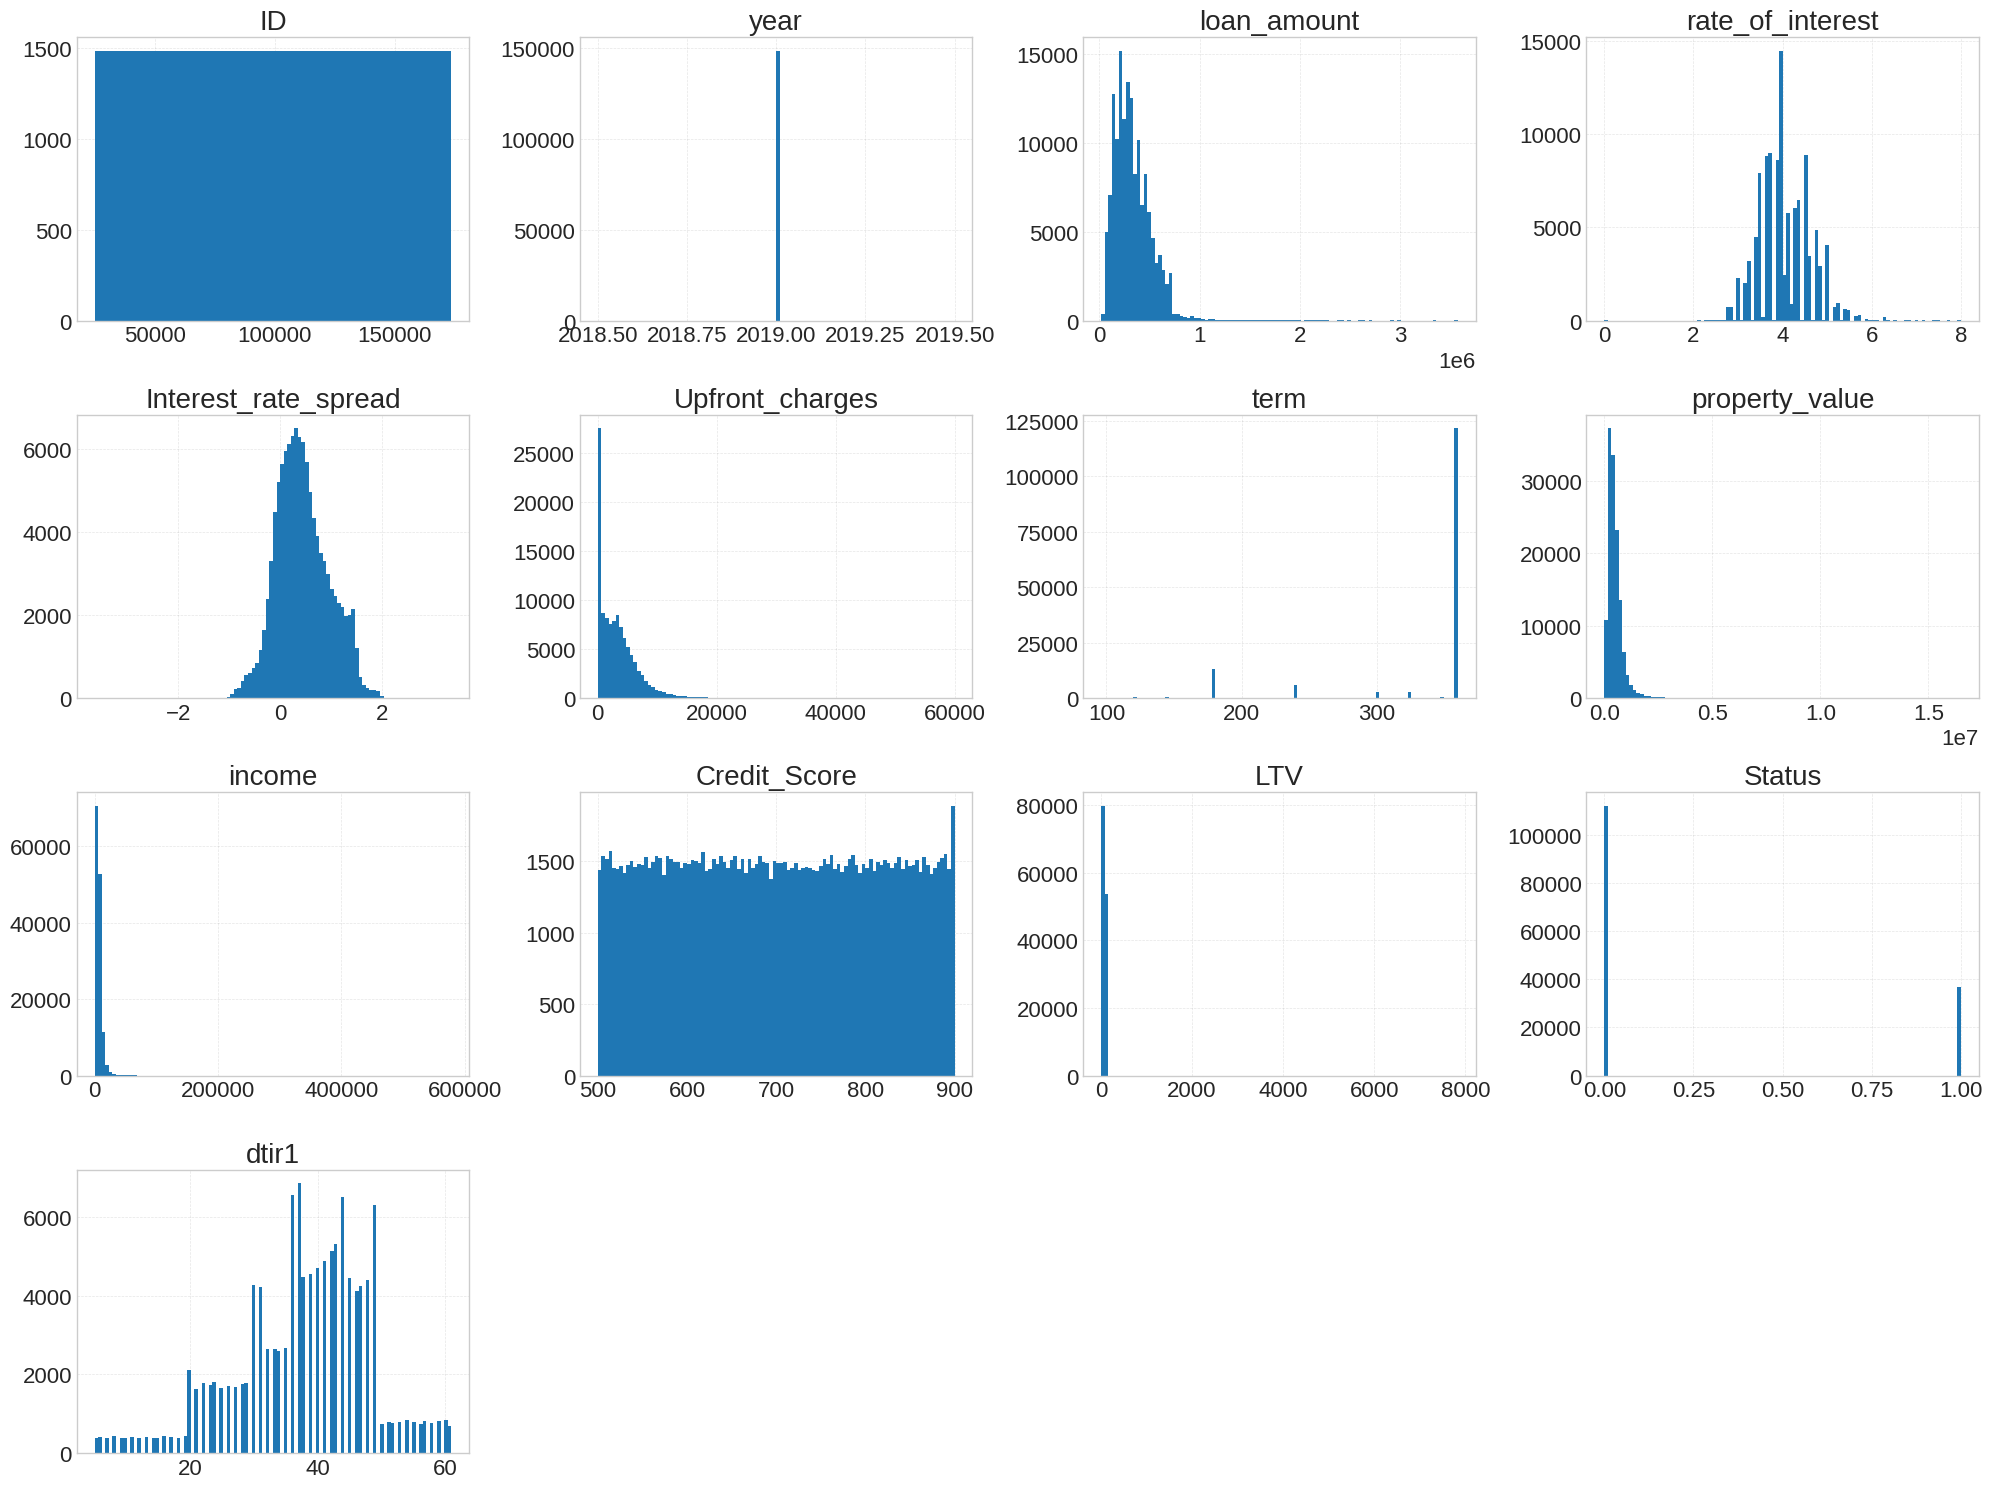

In [14]:
plt.style.use('seaborn-v0_8-whitegrid')

# Set font sizes globally
plt.rcParams.update({
    'axes.titlesize': 20,     
    'axes.labelsize': 18,     
    'xtick.labelsize': 16,   
    'ytick.labelsize': 16     
})

# Create histograms
axes = df.hist(
    bins=100,
    figsize=(20, 15)
)

for ax in axes.flatten():
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Data Cleaning and Preprocessing

In [15]:
#removing duplicates

df = df.drop_duplicates()

In [16]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

### Missing Value Summary  

The dataset contains varying degrees of missing values across different features.  
Notably, `rate_of_interest`, `Interest_rate_spread`, and `Upfront_charges` exhibit the highest number of missing entries, while other features such as `loan_limit`, `income`, `property_value`, and `dtir1` also show substantial gaps that require imputation or removal strategies.  

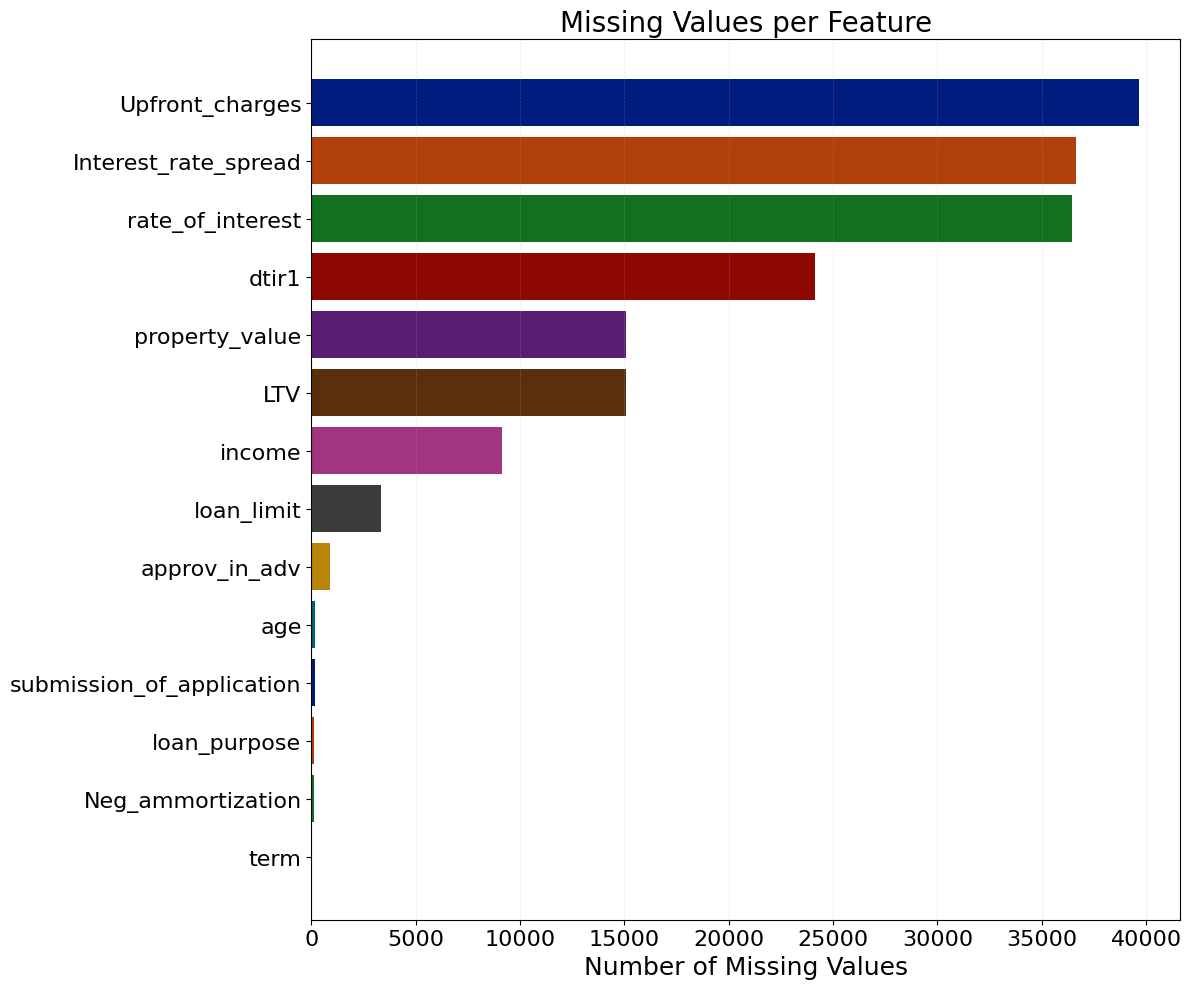

In [17]:
plt.style.use('default')

# Calculate missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Use a consistent dark color palette
palette = sns.color_palette("dark", len(missing_counts))

# Create the plot
plt.figure(figsize=(12, 10))
bars = plt.barh(missing_counts.index, missing_counts.values, color=palette)

# Style axes and labels
plt.xlabel('Number of Missing Values', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Missing Values per Feature', fontsize=20)

# Add faint gridlines on x-axis
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.3)

# Invert y-axis to have the highest values on top
plt.gca().invert_yaxis()

# Clean layout
plt.tight_layout()
plt.show()

### Handling Missing Values  

To address missing data, we filled null entries in specific columns with their respective mode (most frequent value).  
This approach preserves the categorical or skewed nature of the variables while ensuring consistency across the dataset.  

In [18]:
#Filling missing values in specific columns with the mode (most frequent value)

df.loan_limit.fillna(df.loan_limit.mode()[0],inplace=True)
df.dtir1.fillna(df.dtir1.mode()[0],inplace=True)
df.LTV.fillna(df.LTV.mode()[0],inplace=True)
df.submission_of_application.fillna(df.submission_of_application.mode()[0],inplace=True)
df.age.fillna(df.age.mode()[0],inplace=True)
df.income.fillna(df.income.mode()[0],inplace=True)
df.property_value.fillna(df.property_value.mode()[0],inplace=True)
df.Neg_ammortization.fillna(df.Neg_ammortization.mode()[0],inplace=True)
df.term.fillna(df.term.mode()[0],inplace=True)
df.approv_in_adv.fillna(df.approv_in_adv.mode()[0],inplace=True)
df.loan_purpose.fillna(df.loan_purpose.mode()[0],inplace=True)
df.rate_of_interest.fillna(df.rate_of_interest.mode()[0],inplace=True)
df.Interest_rate_spread.fillna(df.Interest_rate_spread.mode()[0],inplace=True)
df.Upfront_charges.fillna(df.Upfront_charges.mode()[0],inplace=True)

In [19]:
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

# Feature Engineering
### Outlier Handling  

We implemented a function to cap outliers using the Interquartile Range (IQR) method.  
Values below the lower bound are replaced with the lower threshold, and values above the upper bound are capped at the upper threshold.  
This reduces the impact of extreme values while retaining the overall distribution.  


In [20]:
#Function to remove outliers in a specific column of the dataframe

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [21]:
#creating a copy for visualizations later
df_vis =df.copy()

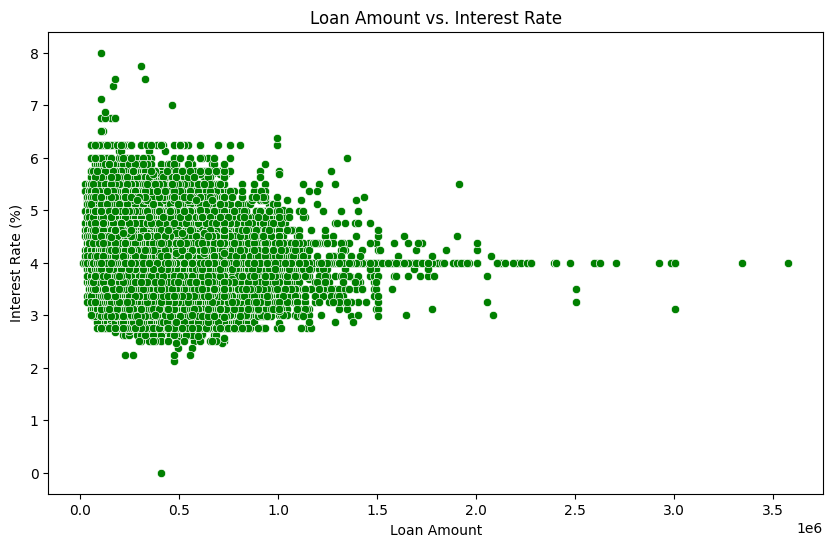

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amount', y='rate_of_interest', data=df_vis, color='green')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()


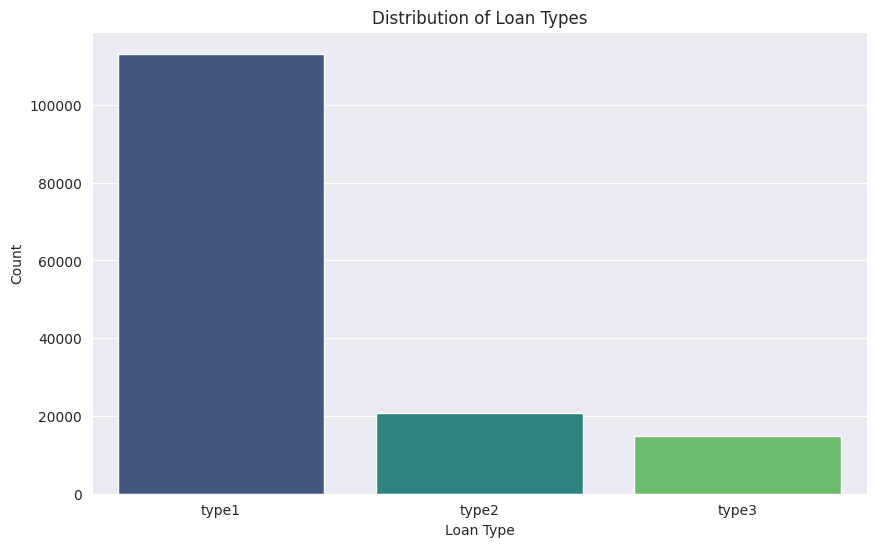

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_type', data=df_vis, palette='viridis')
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

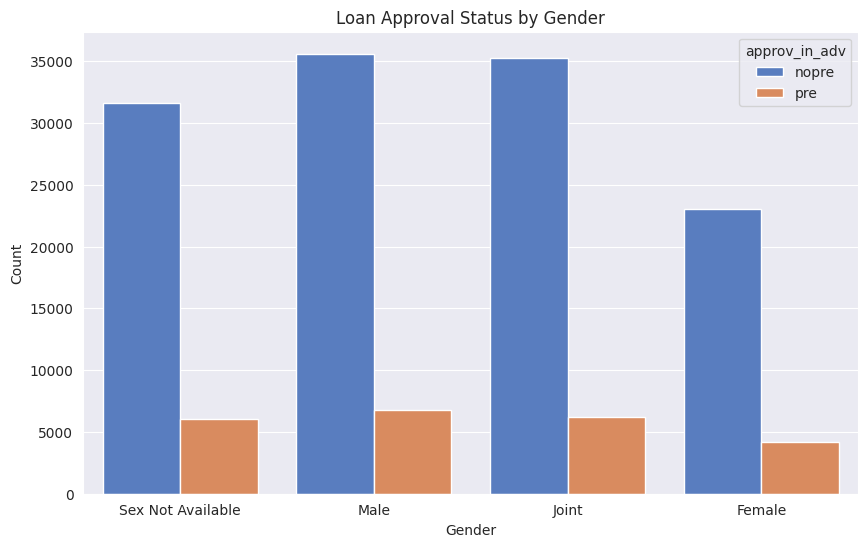

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='approv_in_adv', data=df_vis, palette='muted')
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


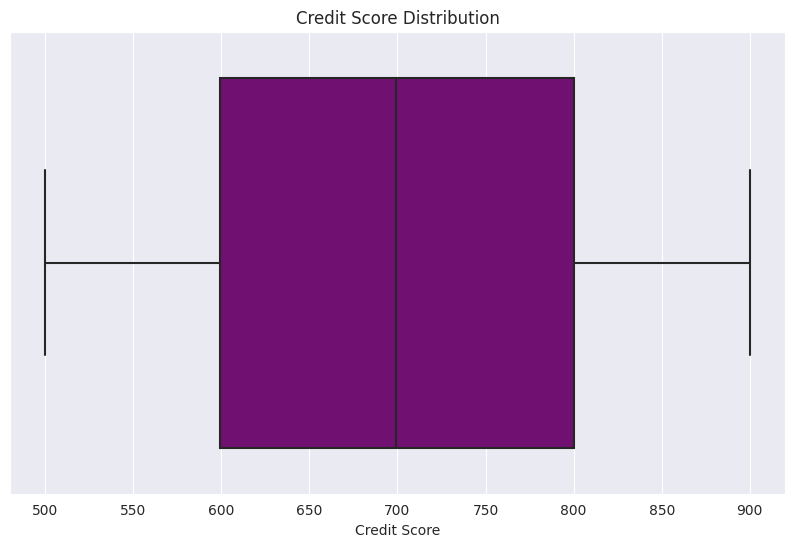

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', data=df_vis, color='purple')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.show()


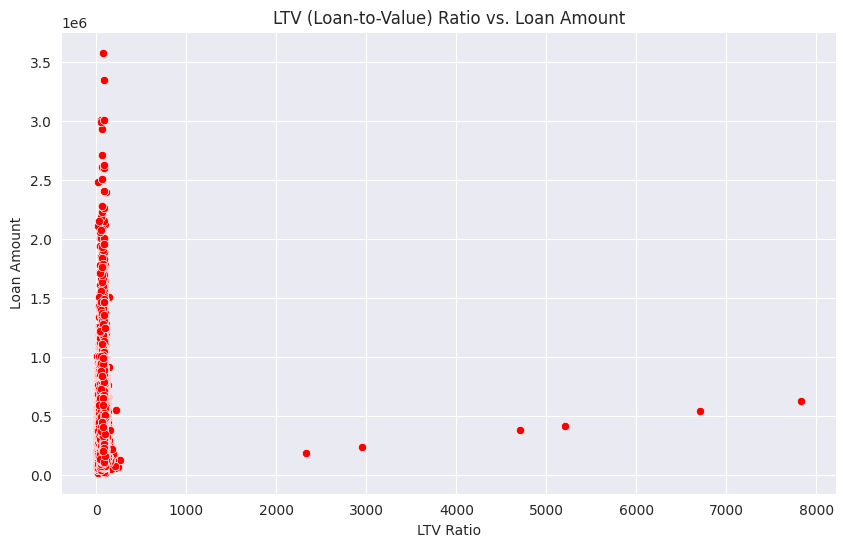

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LTV', y='loan_amount', data=df_vis, color='red')
plt.title('LTV (Loan-to-Value) Ratio vs. Loan Amount')
plt.xlabel('LTV Ratio')
plt.ylabel('Loan Amount')
plt.show()


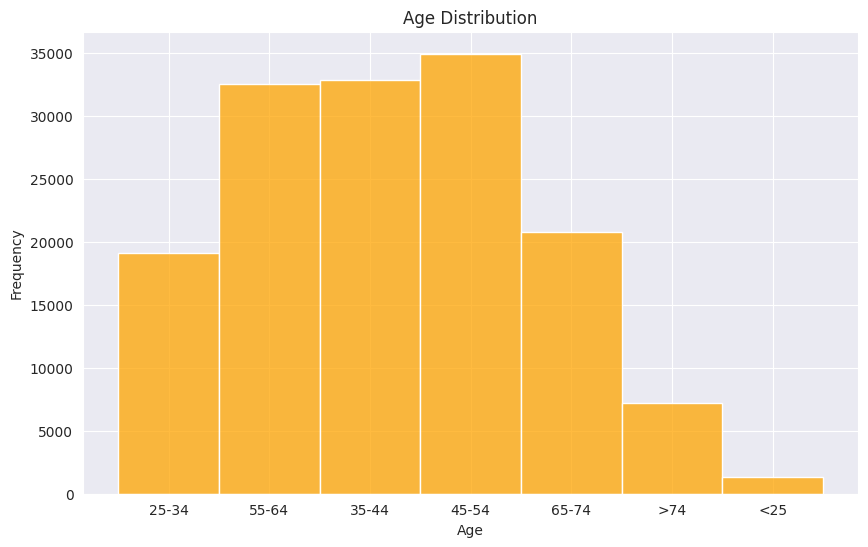

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vis['age'],color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


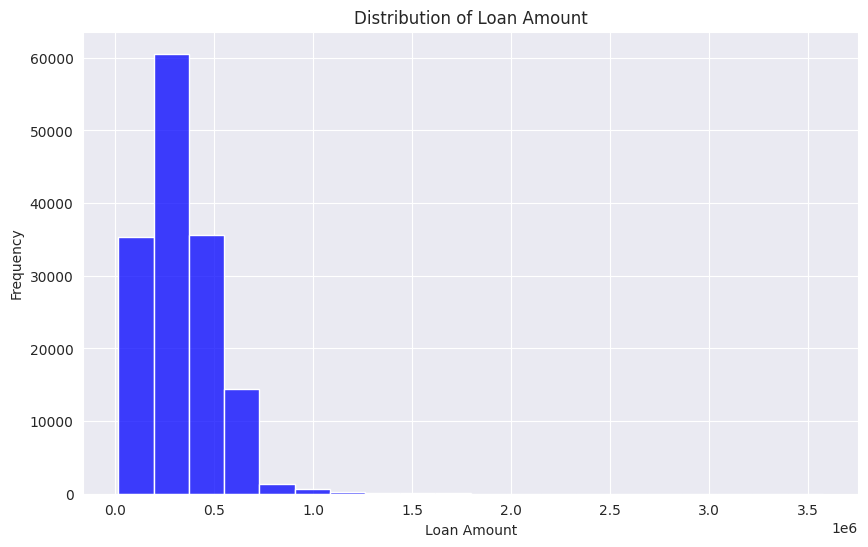

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vis['loan_amount'], kde=False, bins=20, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


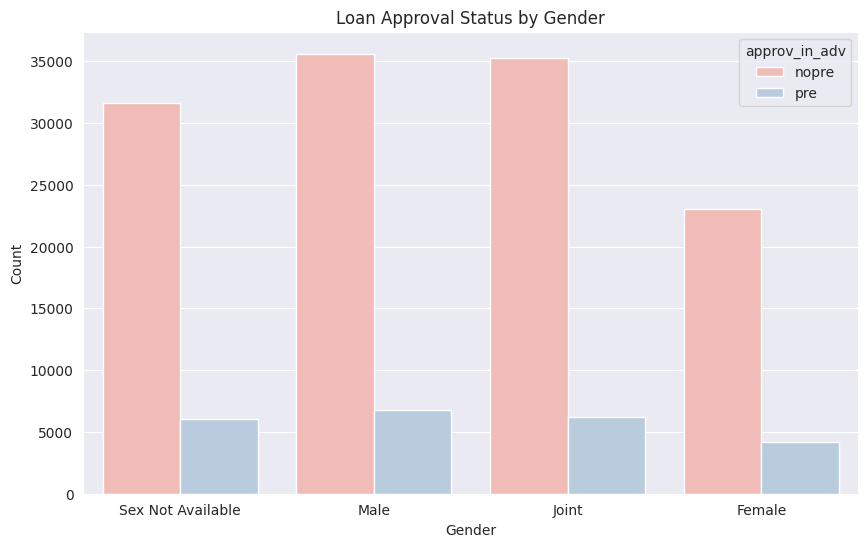

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='approv_in_adv', data=df_vis, palette='Pastel1')
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


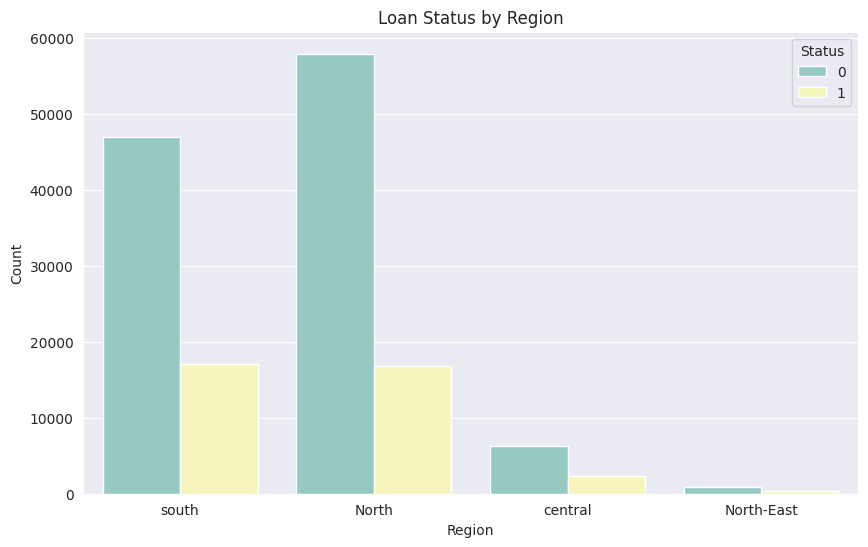

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Status', data=df_vis, palette='Set3')
plt.title('Loan Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

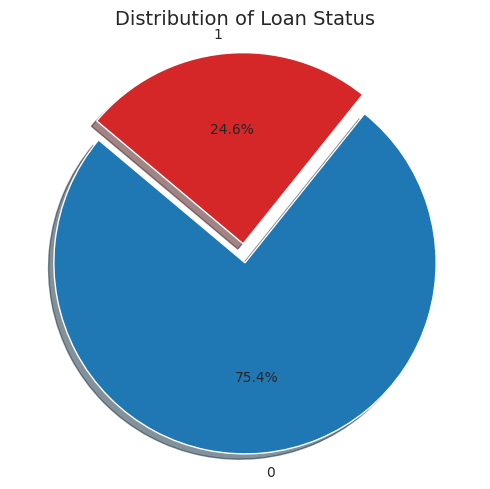

In [31]:
sns.set_style("darkgrid")
status_counts = df_vis['Status'].value_counts()
explode = [0.1 if i == status_counts.min() else 0 for i in status_counts]

colors = ['#1f77b4', '#d62728'] 

plt.figure(figsize=(5, 5))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    startangle=140,
    shadow=True
)
plt.title('Distribution of Loan Status', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [32]:
df.Gender.unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [33]:
df.Gender.value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

## Encoding categorical variables

Categorical features like `Gender` were encoded into numerical values to make it suitable for machine learning models.  
Each category was mapped to a unique integer representation.  


In [34]:
#Encoding Categorical Variables 

df['Gender'] = df['Gender'].replace('Male', 1, regex=True)
df['Gender'] = df['Gender'].replace('Female', 2, regex=True)
df['Gender'] = df['Gender'].replace('Sex Not Available', 3, regex=True)
df['Gender'] = df['Gender'].replace('Joint', 4, regex=True)

In [35]:
df.loan_limit.unique()

array(['cf', 'ncf'], dtype=object)

In [36]:
df['loan_limit'] = [ 1 if i=='cf' else 0 for i in df['loan_limit']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [37]:
df.approv_in_adv.unique()

array(['nopre', 'pre'], dtype=object)

In [38]:
df['approv_in_adv'] = [ 1 if i=='pre' else 0 for i in df['approv_in_adv']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [39]:
df.loan_type.unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [40]:
df['loan_type'] = df['loan_type'].replace('type1', 1, regex=True)
df['loan_type'] = df['loan_type'].replace('type2', 2, regex=True)
df['loan_type'] = df['loan_type'].replace('type3', 3, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [41]:
df.loan_purpose.unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

In [42]:
df['loan_purpose'] = df['loan_purpose'].replace('p1', 1, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p2', 2, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p3', 3, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p4', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [43]:
df.Credit_Worthiness.unique()

array(['l1', 'l2'], dtype=object)

In [44]:
df['Credit_Worthiness'] = [ 1 if i=='l1' else 0 for i in df['Credit_Worthiness']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [45]:
df.open_credit.unique()

array(['nopc', 'opc'], dtype=object)

In [46]:
df['open_credit'] = [ 1 if i=='opc' else 0 for i in df['open_credit']]
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [47]:
df.business_or_commercial.unique()

array(['nob/c', 'b/c'], dtype=object)

In [48]:
df['business_or_commercial'] = [ 1 if i=='b/c' else 0 for i in df['business_or_commercial']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [49]:
df.credit_type.unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [50]:
df['credit_type'] = df['credit_type'].replace('EXP', 1, regex=True)
df['credit_type'] = df['credit_type'].replace('EQUI', 2, regex=True)
df['credit_type'] = df['credit_type'].replace('CRIF', 3, regex=True)
df['credit_type'] = df['credit_type'].replace('CIB', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [51]:
df["co-applicant_credit_type"].unique()


array(['CIB', 'EXP'], dtype=object)

In [52]:
df['co-applicant_credit_type'] = [ 1 if i=='CIB' else 0 for i in df['co-applicant_credit_type']]
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,not_inst,91.886544,North,direct,0,39.0


In [53]:
df.submission_of_application.unique()

array(['to_inst', 'not_inst'], dtype=object)

In [54]:
df['submission_of_application'] = [ 1 if i=='to_inst' else 0 for i in df['submission_of_application']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,North,direct,0,39.0


In [55]:
df.Region.unique()


array(['south', 'North', 'central', 'North-East'], dtype=object)

In [56]:
df['Region'] = df['Region'].replace('south', 1, regex=True)
df['Region'] = df['Region'].replace('North', 2, regex=True)
df['Region'] = df['Region'].replace('central', 3, regex=True)
df['Region'] = df['Region'].replace('North-East', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,1,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,2,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,1,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,2,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,2,direct,0,39.0


In [57]:
df.Security_Type.unique()

array(['direct', 'Indriect'], dtype=object)

In [58]:
df['Security_Type'] = [ 1 if i=='direct' else 0 for i in df['Security_Type']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,1,1,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,2,1,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,1,1,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,2,1,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,2,1,0,39.0


In [59]:
df.age.unique 

<bound method Series.unique of 0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object>

### Label Encoding for Additional Categorical Features

Other categorical features such as `age`, `construction_type`, `occupancy_type`, `interest_only`, `Neg_ammortization`, `lump_sum_payment`, `Secured_by`, and `total_units` were converted to numerical labels using `LabelEncoder`. This ensures that all categorical inputs are compatible with machine learning models.

In [60]:
#Label encoding for other categorical columns

label_encoder = preprocessing.LabelEncoder() 

df['age']= label_encoder.fit_transform(df['age']) 

df['construction_type']= label_encoder.fit_transform(df['construction_type']) 

df['occupancy_type']= label_encoder.fit_transform(df['occupancy_type']) 
 
df['interest_only']= label_encoder.fit_transform(df['interest_only']) 

df['Neg_ammortization']= label_encoder.fit_transform(df['Neg_ammortization']) 

df['lump_sum_payment']= label_encoder.fit_transform(df['lump_sum_payment']) 

df['Secured_by']= label_encoder.fit_transform(df['Secured_by']) 

df['total_units']= label_encoder.fit_transform(df['total_units']) 


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [62]:
#Drop the'Year' and 'ID' column
df = df.drop(columns=["ID"], axis=1)
df = df.drop(columns=["year"], axis=1)

CONSTRUCTING DATA PIPELINES AND SPLITTING DATA INTO TRAIN-TEST SETS

More data cleaning was performed with advanced techniques. After the data is clean, it was prepared for training the models later

In [63]:
num_features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 
                'term', 'property_value', 'income', 'Credit_Score']
cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                'Credit_Worthiness', 'business_or_commercial', 'credit_type', 'age', 'Region']

# Creating a pipeline to process numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('std_scaler', StandardScaler())               
])

# Creating a pipeline to process categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),  
    ('cat', cat_pipeline, cat_features)   
])

### Correlation Analysis of Numerical Features

A correlation matrix was computed for key numerical features such as `loan_amount`, `rate_of_interest`, `Interest_rate_spread`, `Upfront_charges`, `term`, `property_value`, `income`, `Credit_Score`, `LTV`, and `dtir1`. 

The heatmap provides a visual representation of pairwise correlations, highlighting potential multicollinearity and feature relationships that inform model selection and feature engineering.

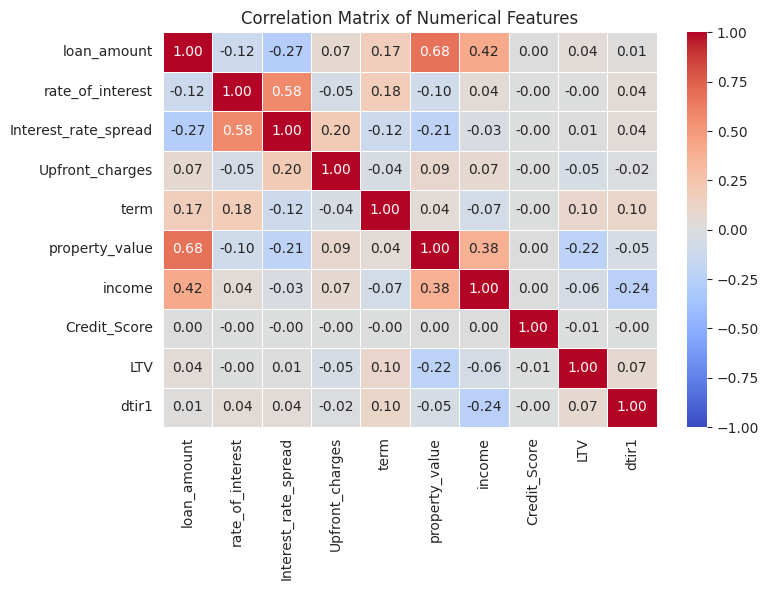

In [64]:
num_features = [
    'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 
    'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1'
]

num_df = df[num_features]
correlation_matrix = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


### Feature Selection

Numerical features were first filtered using a correlation threshold (`0.001`) against the target variable `Status`. Features exceeding the threshold were retained. The `Status` column itself was removed from the selected features to prevent data leakage. 

The selected numerical features were then concatenated with a predefined set of categorical features (`loan_limit`, `Gender`, `approv_in_adv`, `loan_type`, `loan_purpose`, `Credit_Worthiness`, `business_or_commercial`, `credit_type`, `age`, `Region`) to form the final feature set (`X_selected`) used for modeling.

In [65]:
threshold = 0.001

# Computing the correlation matrix
correlation_matrix = df.corr()

high_corr_features = correlation_matrix.index[abs(correlation_matrix["Status"]) > threshold].tolist()

# Removed 'Status' from the list of selected features
high_corr_features.remove("Status")

print("Numerical features selected based on correlation threshold:", high_corr_features)

X_selected = df[high_corr_features]
Y = df["Status"]

cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                'Credit_Worthiness', 'business_or_commercial', 'credit_type', 'age', 'Region']
X_selected = pd.concat([X_selected, df[cat_features]], axis=1)

print("Final selected features (numerical + categorical):")

Numerical features selected based on correlation threshold: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'dtir1']
Final selected features (numerical + categorical):


### Feature Importance Analysis

A Random Forest classifier was trained using the final selected features (`X_selected`) and the target variable (`Y`). 

Feature importances were extracted from the trained model to identify which features have the greatest influence on loan default predictions. The top features, such as `Interest_rate_spread`, `Upfront_charges`, and `rate_of_interest`, dominate the model's decision-making. A horizontal bar plot visually represents the relative importance of each feature, while the accompanying table lists the features ranked from most to least important.

This analysis helps interpret the model and provides insight into the key factors driving loan default outcomes. From the feature importance analysis, the top 10 features were chosen for model training

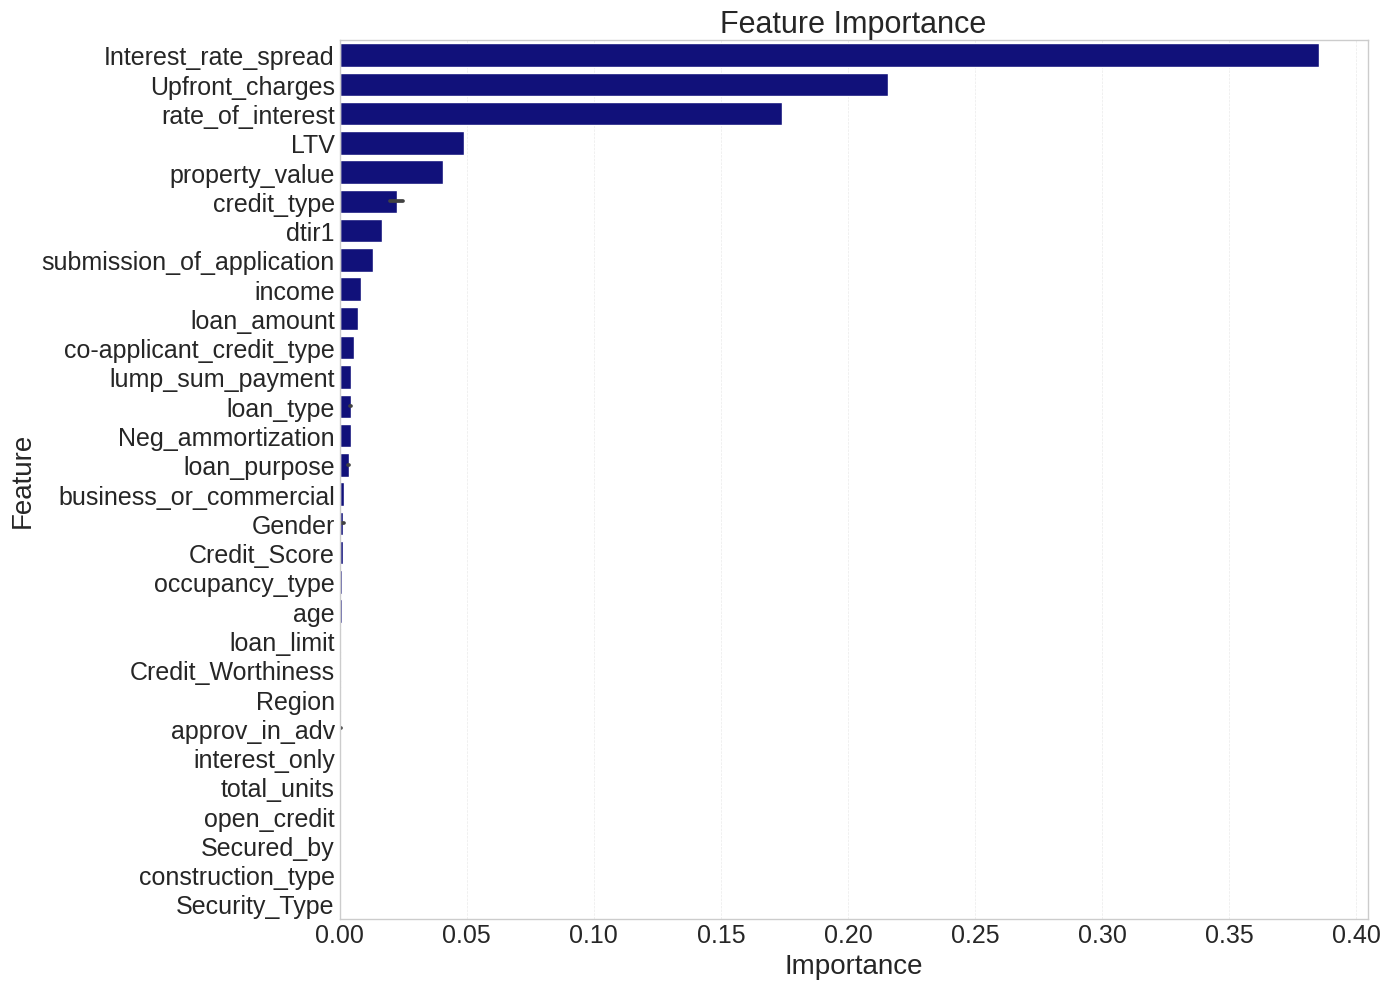


Feature Importance Ranking:
                      Feature  Importance
10       Interest_rate_spread    0.385219
11            Upfront_charges    0.215804
9            rate_of_interest    0.174183
26                        LTV    0.049035
15             property_value    0.040721
21                credit_type    0.024941
37                credit_type    0.019873
29                      dtir1    0.016725
25  submission_of_application    0.013185
20                     income    0.008215
8                 loan_amount    0.007204
23   co-applicant_credit_type    0.005532
14           lump_sum_payment    0.004633
3                   loan_type    0.004595
12          Neg_ammortization    0.004439
33                  loan_type    0.004062
4                loan_purpose    0.003594
34               loan_purpose    0.003447
7      business_or_commercial    0.001846
31                     Gender    0.001834
36     business_or_commercial    0.001586
22               Credit_Score    0.001439
17   

In [66]:
plt.style.use('seaborn-v0_8-whitegrid')

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_selected, Y)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_selected.columns, 
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="Importance", y="Feature", data=feature_importance_df, color='#00008B')
ax.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.4)  
plt.title('Feature Importance', fontsize=22)
plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20)
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()

# Display feature importance table
print("\nFeature Importance Ranking:")
print(feature_importance_df)

In [67]:
# Define the selected features
selected_features = [
    'Interest_rate_spread', 'Upfront_charges', 'rate_of_interest', 
    'property_value', 'LTV', 'credit_type', 'submission_of_application', 
    'dtir1', 'income', 'loan_amount'
]
X_selected = df[selected_features]

In [68]:
X = df[selected_features] 

In [69]:
Y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

### Handling Class Imbalance and Scaling

Class imbalance in the training data was addressed using SMOTE (Synthetic Minority Over-sampling Technique), generating synthetic samples for the minority class to achieve a balanced distribution. The class counts were visualized before and after resampling to confirm the effect of SMOTE. Features were standardized using `StandardScaler` to prepare the data for model training.

Resampled training data shape: (179074, 10)
Status
0    89537
1    89537
Name: count, dtype: int64


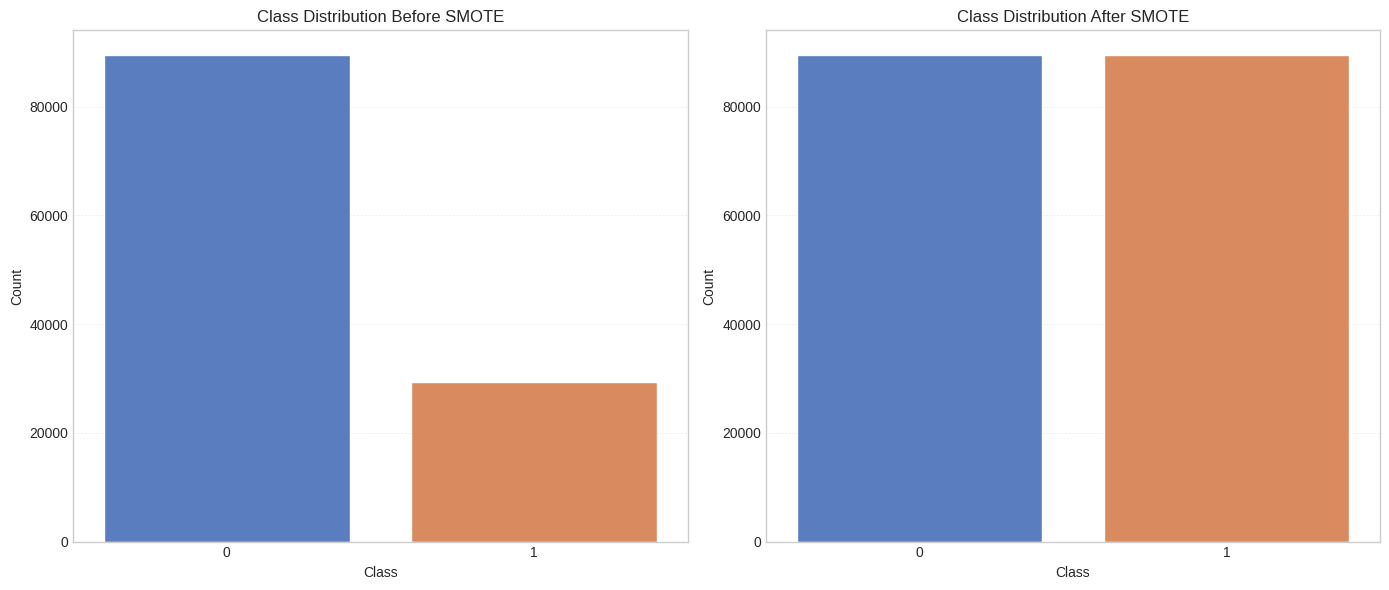

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print(f"Resampled training data shape: {X_train_resampled.shape}")
print(Y_train_resampled.value_counts())

# Plot class distributions before and after SMOTE
custom_palette = sns.color_palette("muted")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=Y_train, ax=axes[0], palette=custom_palette)
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.4)  # Faint gridlines

sns.countplot(x=Y_train_resampled, ax=axes[1], palette=custom_palette)
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.4)  # Faint gridlines

plt.tight_layout()
plt.show()

# Scaling
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

### Dimensionality Reduction with PCA

Principal Component Analysis (PCA) was applied to reduce the dimensionality of the feature space while retaining 95% of the variance. This transformation helps in simplifying the model, reducing noise, and potentially improving computational efficiency. The shapes of the training and test datasets were checked after PCA to confirm the reduction in dimensions.


In [71]:
# Applying PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=0.95)  
X_train_resampled_pca = pca.fit_transform(X_train_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled) 

print(f"Shape of X_train_resampled after PCA: {X_train_resampled_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

Shape of X_train_resampled after PCA: (179074, 9)
Shape of X_test after PCA: (29734, 9)


### Hyperparameter Tuning and Model Training

Hyperparameter optimization was performed using `RandomizedSearchCV` to identify the best model parameters. Logistic Regression (LR) is shown as an example, where the search explored different regularization strengths and solver options. In total, seven models were trained and tuned using similar strategies: Logistic Regression (LR), K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), XGBoost, and Artificial Neural Network (ANN), ensuring each model had optimized hyperparameters for best predictive performance.

In [72]:
param_grid_lr = {
    'C': np.logspace(-2, 2, 10), 
    'solver': ['liblinear'],  
    'penalty': ['l2'],  
    'max_iter': [100]  
}
lr_model = LogisticRegression(random_state=42)

# Setting up RandomizedSearchCV for Logistic Regression (LR)
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_grid_lr, n_iter=20, cv=3, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for Logistic Regression (LR):")
print(random_search_lr.best_params_)

Best Hyperparameters from RandomizedSearchCV for Logistic Regression (LR):
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 100.0}


Training Accuracy for Logistic Regression (LR): 0.9515
Test Accuracy for Logistic Regression (LR): 0.9300
Precision for Logistic Regression (LR): 0.7806
Recall for Logistic Regression (LR): 0.9910
F1 Score for Logistic Regression (LR): 0.8733

Classification Report (Test Data) for Logistic Regression (LR):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     22494
           1       0.78      0.99      0.87      7240

    accuracy                           0.93     29734
   macro avg       0.89      0.95      0.91     29734
weighted avg       0.94      0.93      0.93     29734



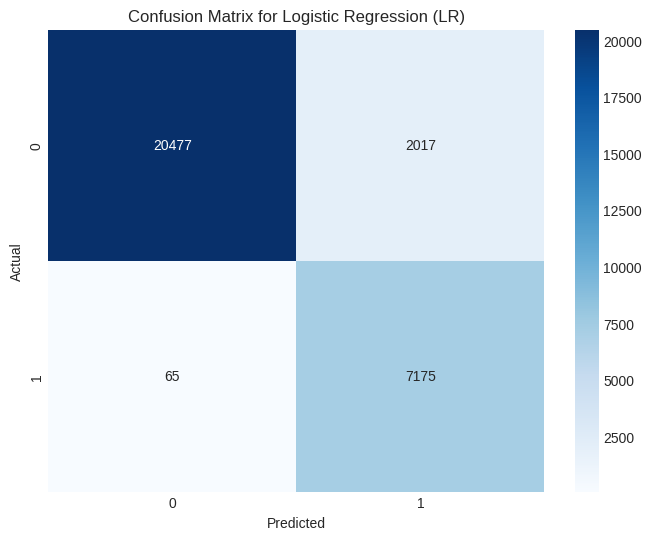

In [73]:
best_lr_model = random_search_lr.best_estimator_
best_lr_model.fit(X_train_resampled_pca, Y_train_resampled)
Y_train_pred_lr = best_lr_model.predict(X_train_resampled_pca)
Y_test_pred_lr = best_lr_model.predict(X_test_pca)

# Metrics
train_accuracy_lr = accuracy_score(Y_train_resampled, Y_train_pred_lr)
test_accuracy_lr = accuracy_score(Y_test, Y_test_pred_lr)
precision_lr = precision_score(Y_test, Y_test_pred_lr)
recall_lr = recall_score(Y_test, Y_test_pred_lr)
f1_lr = f1_score(Y_test, Y_test_pred_lr)

print(f"Training Accuracy for Logistic Regression (LR): {train_accuracy_lr:.4f}")
print(f"Test Accuracy for Logistic Regression (LR): {test_accuracy_lr:.4f}")
print(f"Precision for Logistic Regression (LR): {precision_lr:.4f}")
print(f"Recall for Logistic Regression (LR): {recall_lr:.4f}")
print(f"F1 Score for Logistic Regression (LR): {f1_lr:.4f}")

print("\nClassification Report (Test Data) for Logistic Regression (LR):")
print(classification_report(Y_test, Y_test_pred_lr))

conf_matrix_lr = confusion_matrix(Y_test, Y_test_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Logistic Regression (LR)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],         
    'weights': ['uniform'],               
    'metric': ['euclidean']                
}

# Initialize KNN model
knn_model = KNeighborsClassifier()


X_subsample = X_train_resampled_pca[:5000]  
Y_subsample = Y_train_resampled[:5000]

random_search_knn = RandomizedSearchCV(
    knn_model,
    param_distributions=param_grid_knn,
    n_iter=5,      
    cv=2,         
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search_knn.fit(X_subsample, Y_subsample)

print("Best Hyperparameters from RandomizedSearchCV for KNN:")
print(random_search_knn.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Hyperparameters from RandomizedSearchCV for KNN:
{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean'}


Training Accuracy for K-Nearest Neighbors (KNN): 0.9923
Test Accuracy for K-Nearest Neighbors (KNN): 0.9819
Precision for K-Nearest Neighbors (KNN): 0.9338
Recall for K-Nearest Neighbors (KNN): 0.9963
F1 Score for K-Nearest Neighbors (KNN): 0.9640

Classification Report (Test Data) for K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22494
           1       0.93      1.00      0.96      7240

    accuracy                           0.98     29734
   macro avg       0.97      0.99      0.98     29734
weighted avg       0.98      0.98      0.98     29734



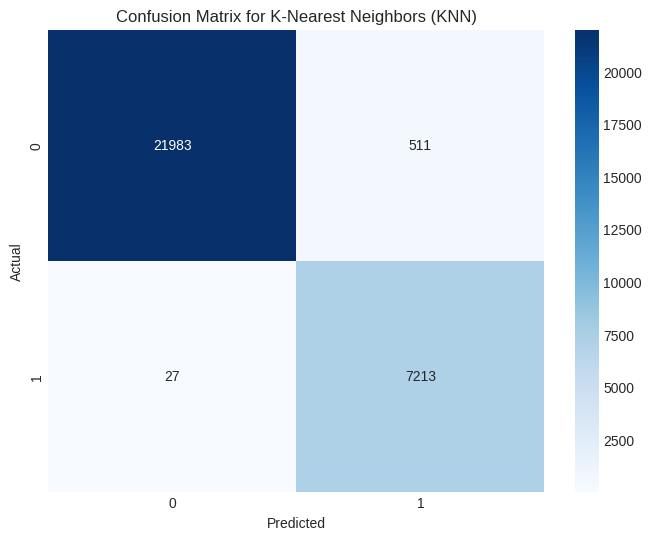

In [75]:
# Get the best KNN model from RandomizedSearchCV
best_knn_model = random_search_knn.best_estimator_
best_knn_model.fit(X_train_resampled_pca, Y_train_resampled)

# Predictions
Y_train_pred_knn = best_knn_model.predict(X_train_resampled_pca)
Y_test_pred_knn = best_knn_model.predict(X_test_pca)

train_accuracy_knn = accuracy_score(Y_train_resampled, Y_train_pred_knn)
test_accuracy_knn = accuracy_score(Y_test, Y_test_pred_knn)
precision_knn = precision_score(Y_test, Y_test_pred_knn)
recall_knn = recall_score(Y_test, Y_test_pred_knn)
f1_knn = f1_score(Y_test, Y_test_pred_knn)

print(f"Training Accuracy for K-Nearest Neighbors (KNN): {train_accuracy_knn:.4f}")
print(f"Test Accuracy for K-Nearest Neighbors (KNN): {test_accuracy_knn:.4f}")
print(f"Precision for K-Nearest Neighbors (KNN): {precision_knn:.4f}")
print(f"Recall for K-Nearest Neighbors (KNN): {recall_knn:.4f}")
print(f"F1 Score for K-Nearest Neighbors (KNN): {f1_knn:.4f}")

print("\nClassification Report (Test Data) for K-Nearest Neighbors (KNN):")
print(classification_report(Y_test, Y_test_pred_knn))

conf_matrix_knn = confusion_matrix(Y_test, Y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
param_grid_linear_svm = {
    'C': [0.1, 1, 10]
}
linear_svm = LinearSVC(random_state=42, max_iter=1000)

random_search_svm = RandomizedSearchCV(
    estimator=linear_svm,
    param_distributions=param_grid_linear_svm,
    n_iter=3,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search_svm.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for Linear SVM:")
print(random_search_svm.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Hyperparameters from RandomizedSearchCV for Linear SVM:
{'C': 10}


Training Accuracy for SVM: 0.9472
Test Accuracy for SVM: 0.9224
Precision (macro): 0.8793
Recall (macro): 0.9467
F1 Score (macro): 0.9040

Classification Report (Test Data) for SVM:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     22494
           1       0.76      0.99      0.86      7240

    accuracy                           0.92     29734
   macro avg       0.88      0.95      0.90     29734
weighted avg       0.94      0.92      0.93     29734



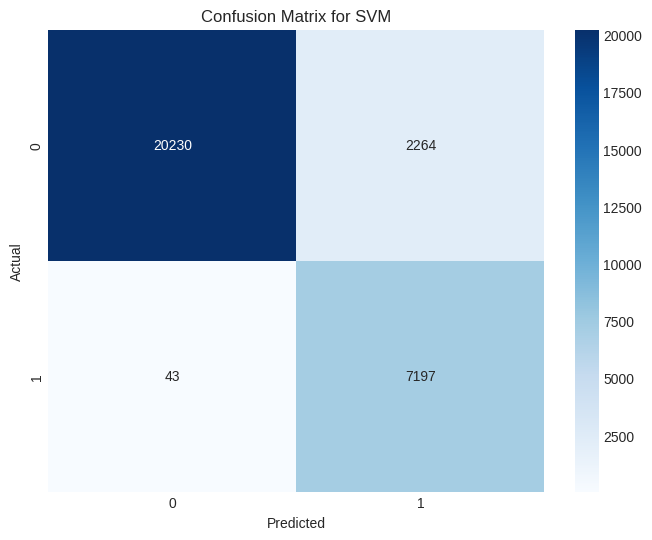

In [77]:
best_svm_model = random_search_svm.best_estimator_
best_svm_model.fit(X_train_resampled_pca, Y_train_resampled)

Y_train_pred_svm = best_svm_model.predict(X_train_resampled_pca)
Y_test_pred_svm = best_svm_model.predict(X_test_pca)

# SVM Metrics
train_accuracy_svm = accuracy_score(Y_train_resampled, Y_train_pred_svm)
test_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)
precision_svm = precision_score(Y_test, Y_test_pred_svm, average='macro')
recall_svm = recall_score(Y_test, Y_test_pred_svm, average='macro')
f1_svm = f1_score(Y_test, Y_test_pred_svm, average='macro')

print(f"Training Accuracy for SVM: {train_accuracy_svm:.4f}")
print(f"Test Accuracy for SVM: {test_accuracy_svm:.4f}")
print(f"Precision (macro): {precision_svm:.4f}")
print(f"Recall (macro): {recall_svm:.4f}")
print(f"F1 Score (macro): {f1_svm:.4f}")

print("\nClassification Report (Test Data) for SVM:")
print(classification_report(Y_test, Y_test_pred_svm))

conf_matrix_svm = confusion_matrix(Y_test, Y_test_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'criterion': ['gini', 'entropy'],  
    'random_state': [42]  
}
dt_model = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_grid_dt, n_iter=20, cv=3, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train_resampled_pca, Y_train_resampled)
print("Best Hyperparameters from RandomizedSearchCV for Decision Tree:")
print(random_search_dt.best_params_)

Best Hyperparameters from RandomizedSearchCV for Decision Tree:
{'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}


Training Accuracy for Decision Tree (DT): 0.9993
Test Accuracy for Decision Tree (DT): 0.9862
Precision for Decision Tree (DT): 0.9607
Recall for Decision Tree (DT): 0.9834
F1 Score for Decision Tree (DT): 0.9719

Classification Report (Test Data) for Decision Tree (DT):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22494
           1       0.96      0.98      0.97      7240

    accuracy                           0.99     29734
   macro avg       0.98      0.99      0.98     29734
weighted avg       0.99      0.99      0.99     29734



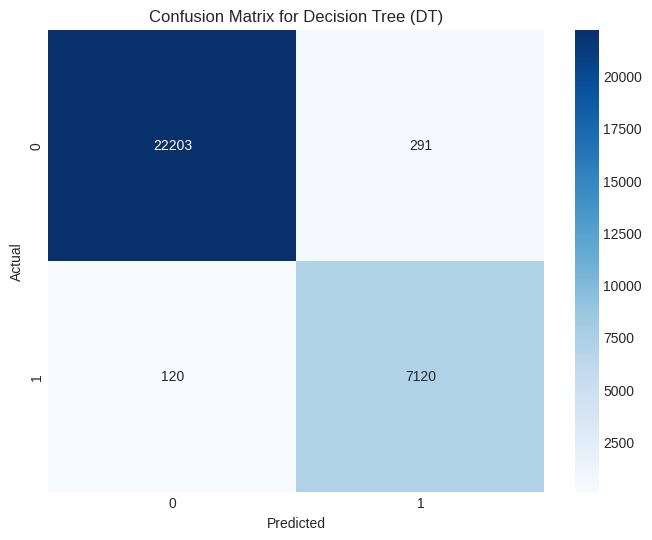

In [79]:
# Get the best Decision Tree model from RandomizedSearchCV
best_dt_model = random_search_dt.best_estimator_
best_dt_model.fit(X_train_resampled_pca, Y_train_resampled)

# Predictions
Y_train_pred_dt = best_dt_model.predict(X_train_resampled_pca)
Y_test_pred_dt = best_dt_model.predict(X_test_pca)

train_accuracy_dt = accuracy_score(Y_train_resampled, Y_train_pred_dt)
test_accuracy_dt = accuracy_score(Y_test, Y_test_pred_dt)
precision_dt = precision_score(Y_test, Y_test_pred_dt)
recall_dt = recall_score(Y_test, Y_test_pred_dt)
f1_dt = f1_score(Y_test, Y_test_pred_dt)

print(f"Training Accuracy for Decision Tree (DT): {train_accuracy_dt:.4f}")
print(f"Test Accuracy for Decision Tree (DT): {test_accuracy_dt:.4f}")
print(f"Precision for Decision Tree (DT): {precision_dt:.4f}")
print(f"Recall for Decision Tree (DT): {recall_dt:.4f}")
print(f"F1 Score for Decision Tree (DT): {f1_dt:.4f}")

print("\nClassification Report (Test Data) for Decision Tree (DT):")
print(classification_report(Y_test, Y_test_pred_dt))

conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Decision Tree (DT)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [80]:
param_grid_rf = {
    'n_estimators': np.arange(10, 101, 10),  
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt'],  
}
rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid_rf,
    n_iter=10,  
    cv=3, 
    random_state=42,
    n_jobs=-1, 
    verbose=1  
)
random_search_rf.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for Random Forest:")
print(random_search_rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters from RandomizedSearchCV for Random Forest:
{'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


Training Accuracy for Random Forest (RF): 0.9966
Test Accuracy for Random Forest (RF): 0.9891
Precision for Random Forest (RF): 0.9619
Recall for Random Forest (RF): 0.9946
F1 Score for Random Forest (RF): 0.9780

Classification Report (Test Data) for Random Forest (RF):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22494
           1       0.96      0.99      0.98      7240

    accuracy                           0.99     29734
   macro avg       0.98      0.99      0.99     29734
weighted avg       0.99      0.99      0.99     29734



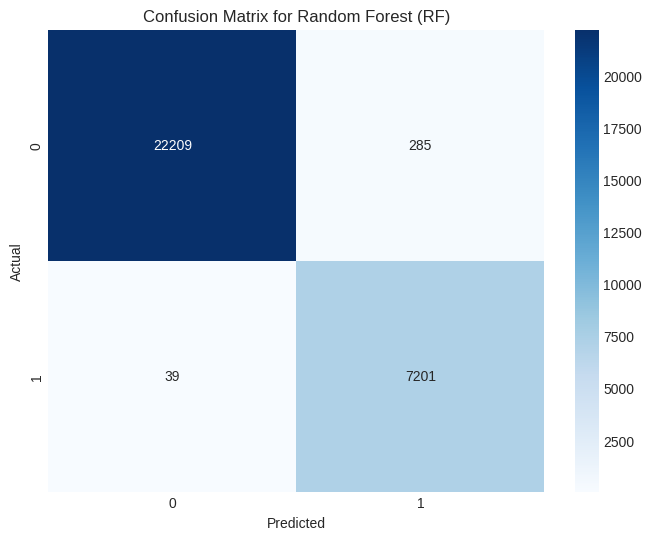

In [81]:
# Get the best Random Forest model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train_resampled_pca, Y_train_resampled)

# Predictions
Y_train_pred_rf = best_rf_model.predict(X_train_resampled_pca)
Y_test_pred_rf = best_rf_model.predict(X_test_pca)

train_accuracy_rf = accuracy_score(Y_train_resampled, Y_train_pred_rf)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
precision_rf = precision_score(Y_test, Y_test_pred_rf)
recall_rf = recall_score(Y_test, Y_test_pred_rf)
f1_rf = f1_score(Y_test, Y_test_pred_rf)

print(f"Training Accuracy for Random Forest (RF): {train_accuracy_rf:.4f}")
print(f"Test Accuracy for Random Forest (RF): {test_accuracy_rf:.4f}")
print(f"Precision for Random Forest (RF): {precision_rf:.4f}")
print(f"Recall for Random Forest (RF): {recall_rf:.4f}")
print(f"F1 Score for Random Forest (RF): {f1_rf:.4f}")

print("\nClassification Report (Test Data) for Random Forest (RF):")
print(classification_report(Y_test, Y_test_pred_rf))

conf_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for Random Forest (RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
param_grid_xgb = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 6, 10],  
    'learning_rate': [0.01, 0.05, 0.1], 
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8],  
    'gamma': [0, 0.1, 0.2],  
    'random_state': [42]  
}
xgb_model = XGBClassifier(
    random_state=42,
    tree_method='hist',  
    n_jobs=-1  
)
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=10,  
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1  
)
random_search_xgb.fit(X_train_resampled_pca, Y_train_resampled)

print("Best Hyperparameters from RandomizedSearchCV for XGBoost:")
print(random_search_xgb.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters from RandomizedSearchCV for XGBoost:
{'subsample': 0.8, 'random_state': 42, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


[0]	validation_0-logloss:0.62700
[1]	validation_0-logloss:0.57172
[2]	validation_0-logloss:0.53332
[3]	validation_0-logloss:0.48121
[4]	validation_0-logloss:0.43756
[5]	validation_0-logloss:0.40374
[6]	validation_0-logloss:0.37462
[7]	validation_0-logloss:0.35918
[8]	validation_0-logloss:0.33049
[9]	validation_0-logloss:0.30486
[10]	validation_0-logloss:0.28208
[11]	validation_0-logloss:0.26591
[12]	validation_0-logloss:0.24841
[13]	validation_0-logloss:0.23152
[14]	validation_0-logloss:0.21657
[15]	validation_0-logloss:0.20415
[16]	validation_0-logloss:0.19120
[17]	validation_0-logloss:0.17934
[18]	validation_0-logloss:0.17053
[19]	validation_0-logloss:0.16303
[20]	validation_0-logloss:0.15462
[21]	validation_0-logloss:0.14735
[22]	validation_0-logloss:0.14003
[23]	validation_0-logloss:0.13437
[24]	validation_0-logloss:0.13041
[25]	validation_0-logloss:0.12555
[26]	validation_0-logloss:0.11983
[27]	validation_0-logloss:0.11432
[28]	validation_0-logloss:0.11192
[29]	validation_0-loglos

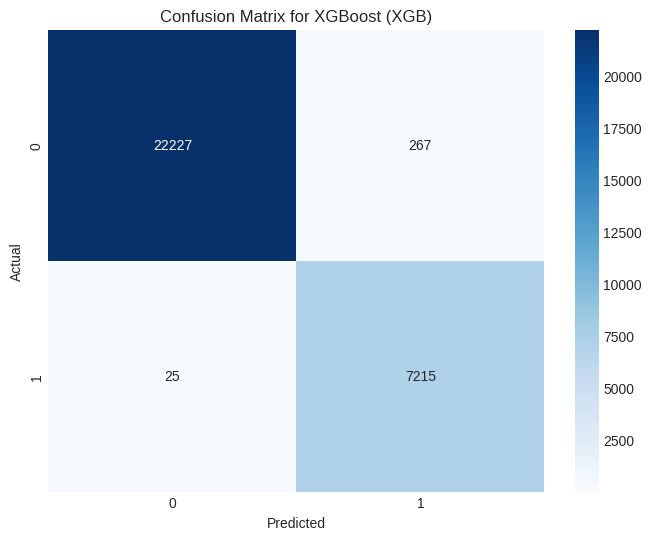

In [83]:
best_xgb_model = random_search_xgb.best_estimator_

# Train the XGBoost model
best_xgb_model.fit(
    X_train_resampled_pca, Y_train_resampled,
    eval_set=[(X_test_pca, Y_test)],
    verbose=True
)
# Predictions
Y_train_pred_xgb = best_xgb_model.predict(X_train_resampled_pca)
Y_test_pred_xgb = best_xgb_model.predict(X_test_pca)

train_accuracy_xgb = accuracy_score(Y_train_resampled, Y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(Y_test, Y_test_pred_xgb)
precision_xgb = precision_score(Y_test, Y_test_pred_xgb)
recall_xgb = recall_score(Y_test, Y_test_pred_xgb)
f1_xgb = f1_score(Y_test, Y_test_pred_xgb)

print(f"Training Accuracy for XGBoost (XGB): {train_accuracy_xgb:.4f}")
print(f"Test Accuracy for XGBoost (XGB): {test_accuracy_xgb:.4f}")
print(f"Precision for XGBoost (XGB): {precision_xgb:.4f}")
print(f"Recall for XGBoost (XGB): {recall_xgb:.4f}")
print(f"F1 Score for XGBoost (XGB): {f1_xgb:.4f}")

print("\nClassification Report (Test Data) for XGBoost (XGB):")
print(classification_report(Y_test, Y_test_pred_xgb))

conf_matrix_xgb = confusion_matrix(Y_test, Y_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for XGBoost (XGB)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

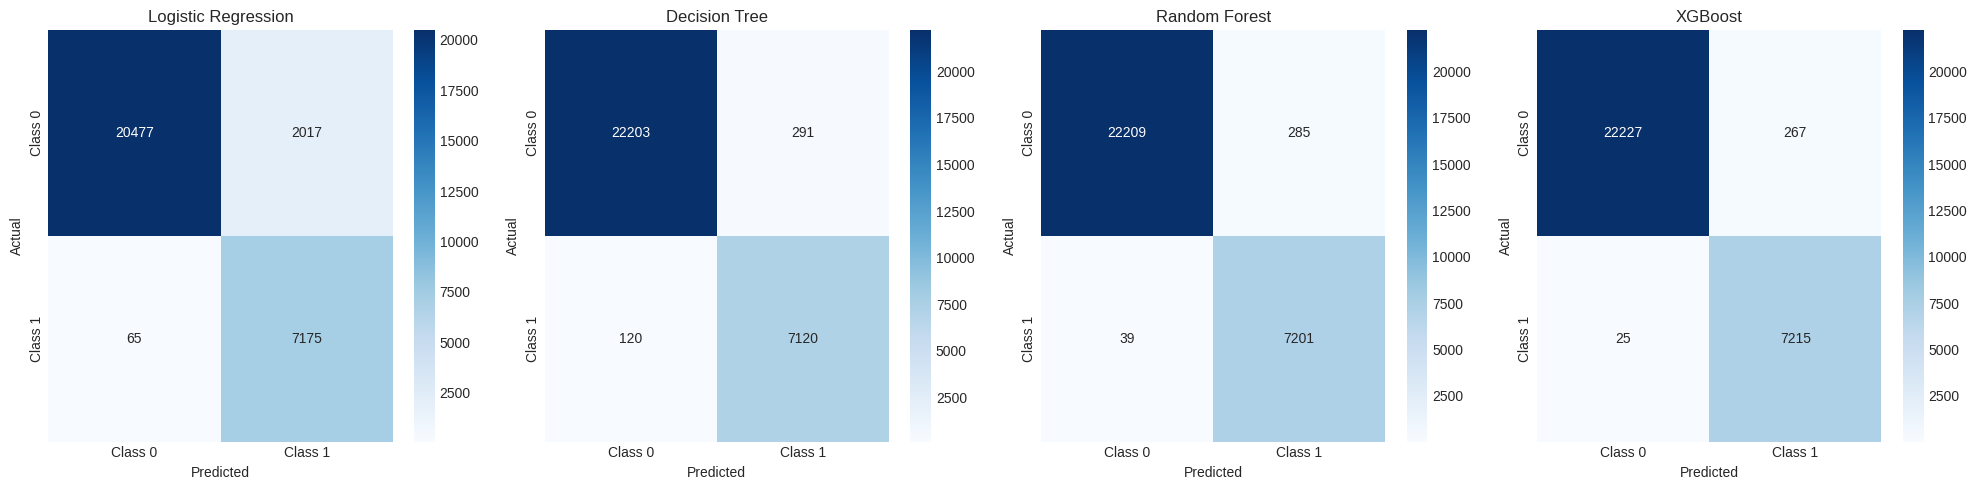

In [84]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Getting the predictions for each model
Y_train_pred_lr = best_lr_model.predict(X_train_resampled_pca)
Y_test_pred_lr = best_lr_model.predict(X_test_pca)

Y_train_pred_dt = best_dt_model.predict(X_train_resampled_pca)
Y_test_pred_dt = best_dt_model.predict(X_test_pca)

Y_train_pred_rf = best_rf_model.predict(X_train_resampled_pca)
Y_test_pred_rf = best_rf_model.predict(X_test_pca)

Y_train_pred_xgb = best_xgb_model.predict(X_train_resampled_pca)
Y_test_pred_xgb = best_xgb_model.predict(X_test_pca)

# Confusion matrices
conf_matrix_lr = confusion_matrix(Y_test, Y_test_pred_lr)
conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)
conf_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)
conf_matrix_xgb = confusion_matrix(Y_test, Y_test_pred_xgb)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[3])
axes[3].set_title('XGBoost')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [85]:
x_train_scaled = X_train_resampled_pca
x_test_scaled = X_test_pca
y_train_cat = Y_train_resampled
y_test_cat = Y_test

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))  


# Compile the Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_scaled, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_scaled, y_test_cat),
    shuffle=True  
)

Epoch 1/10


2025-07-17 06:37:23.699486: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-07-17 06:37:23.915535: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


5591/5597 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 0.1906

2025-07-17 06:37:40.920054: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


5597/5597 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9244 - loss: 0.1905 - val_accuracy: 0.9897 - val_loss: 0.0336
Epoch 2/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9854 - loss: 0.0525 - val_accuracy: 0.9929 - val_loss: 0.0246
Epoch 3/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9881 - loss: 0.0434 - val_accuracy: 0.9939 - val_loss: 0.0217
Epoch 4/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9893 - loss: 0.0398 - val_accuracy: 0.9940 - val_loss: 0.0211
Epoch 5/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9900 - loss: 0.0384 - val_accuracy: 0.9937 - val_loss: 0.0220
Epoch 6/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9906 - loss: 0.0355 - val_accuracy: 0.9938 - val_loss: 0.0203
Epoch 7/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9905 - loss: 0.0357 - val_accuracy: 0.9947 - val_loss: 0.0182
Epoch 8/10
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9912 - loss: 0.0350 - val

  41/5597 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step     

2025-07-17 06:39:59.836360: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


5597/5597 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
125/930 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2025-07-17 06:40:09.679944: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Accuracy for ANN: 0.9962
Test Accuracy for ANN: 0.9946
Precision (macro): 0.9896
Recall (macro): 0.9958
F1 Score (macro): 0.9927

Classification Report (Test Data) for ANN:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22494
           1       0.98      1.00      0.99      7240

    accuracy                           0.99     29734
   macro avg       0.99      1.00      0.99     29734
weighted avg       0.99      0.99      0.99     29734



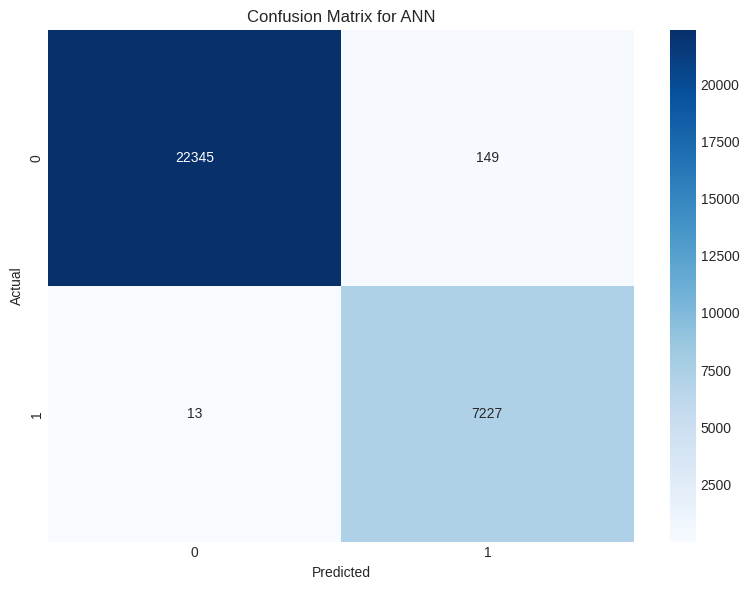

In [86]:
# Training predictions
y_train_pred_ann = model.predict(x_train_scaled)
y_train_pred_ann_classes = (y_train_pred_ann > 0.5).astype("int32")

# Test predictions
y_test_pred_ann = model.predict(x_test_scaled)
y_test_pred_ann_classes = (y_test_pred_ann > 0.5).astype("int32")

# Metrics
train_accuracy_ann = accuracy_score(y_train_cat, y_train_pred_ann_classes)
test_accuracy_ann = accuracy_score(y_test_cat, y_test_pred_ann_classes)
precision_ann = precision_score(y_test_cat, y_test_pred_ann_classes, average='macro')
recall_ann = recall_score(y_test_cat, y_test_pred_ann_classes, average='macro')
f1_ann = f1_score(y_test_cat, y_test_pred_ann_classes, average='macro')

print(f"Training Accuracy for ANN: {train_accuracy_ann:.4f}")
print(f"Test Accuracy for ANN: {test_accuracy_ann:.4f}")
print(f"Precision (macro): {precision_ann:.4f}")
print(f"Recall (macro): {recall_ann:.4f}")
print(f"F1 Score (macro): {f1_ann:.4f}")

print("\nClassification Report (Test Data) for ANN:")
print(classification_report(y_test_cat, y_test_pred_ann_classes))

conf_matrix_ann = confusion_matrix(y_test_cat, y_test_pred_ann_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

5597/5597 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
129/930 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2025-07-17 06:40:20.430289: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


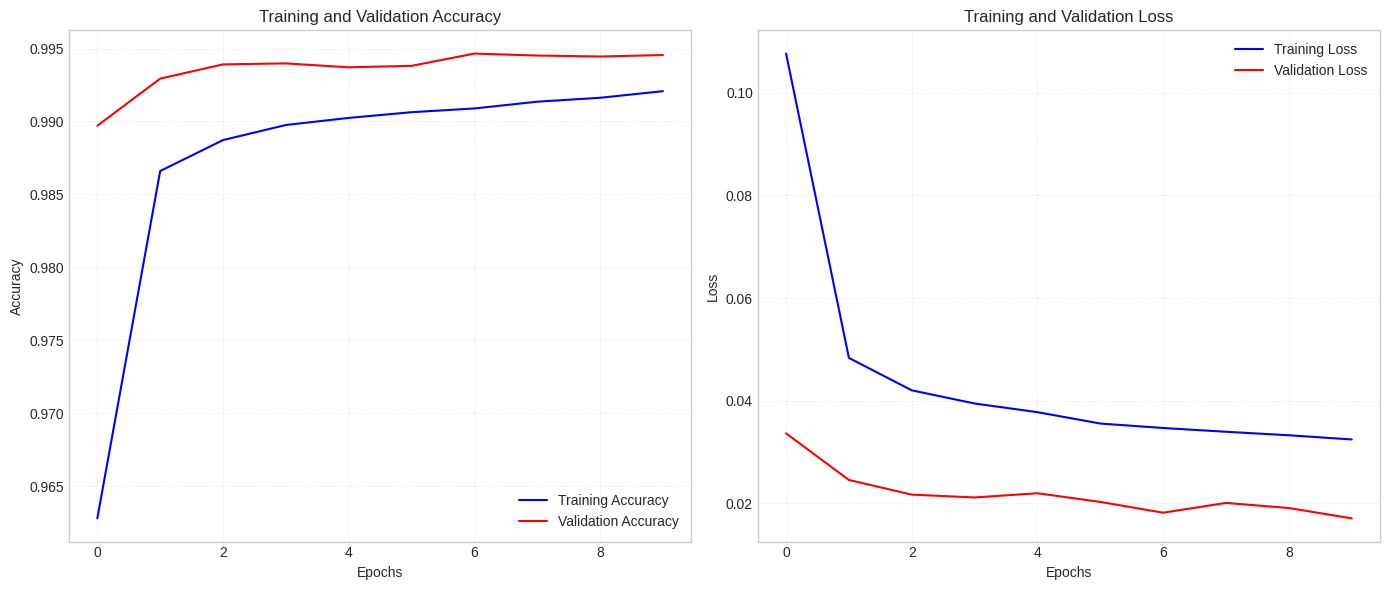

In [87]:
# Use a light style (no dark grid)
plt.style.use('seaborn-v0_8-whitegrid')

# Predictions
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Converting probabilities to class labels
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")
train_accuracy = accuracy_score(y_train_cat, y_train_pred_classes)
test_accuracy = accuracy_score(y_test_cat, y_test_pred_classes)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()

In [88]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 5,892 (23.02 KB)

### ROC Analysis

The predictive performance of all trained models was evaluated using ROC (Receiver Operating Characteristic) curves and AUC (Area Under the Curve) metrics. Prediction probabilities for each model—Logistic Regression (LR), Decision Tree (DT), Random Forest (RF), XGBoost, Artificial Neural Network (ANN), Support Vector Machine (SVC), and K-Nearest Neighbors (KNN)—were computed on the test set. ROC curves were then plotted together to compare models, showing the trade-off between true positive rate (TPR) and false positive rate (FPR) and highlighting which models achieve higher discrimination for loan default prediction.

930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


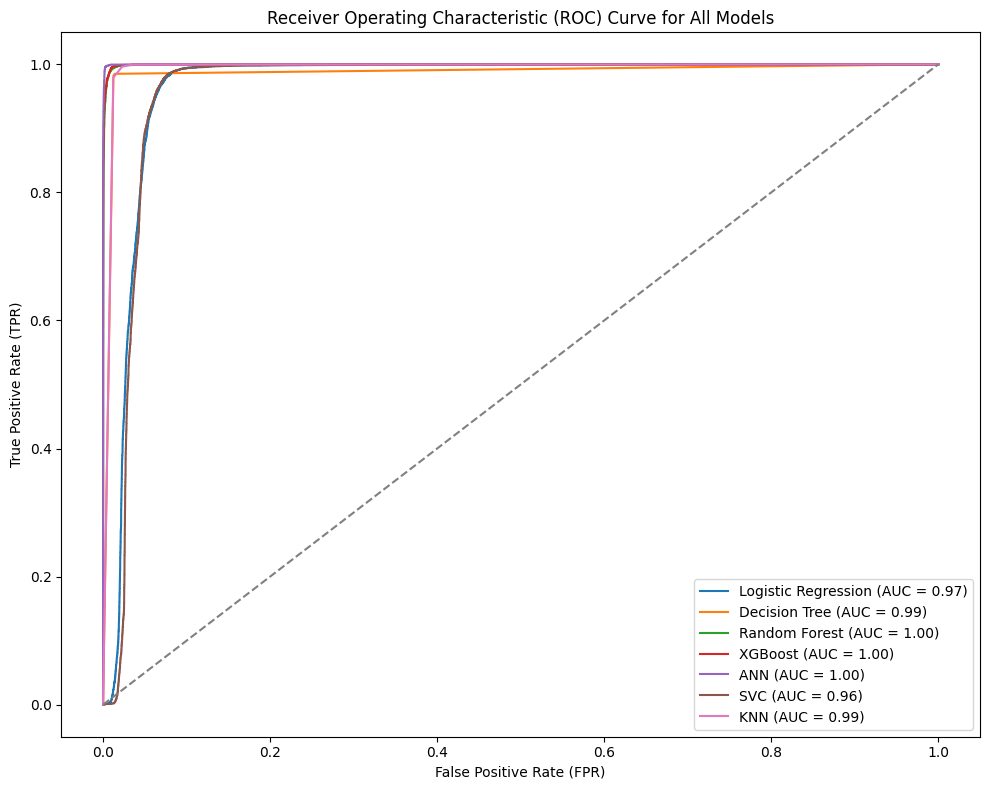

In [89]:
plt.style.use('default')

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN', 'SVC', 'KNN']

# Get prediction probabilities
y_test_pred_prob_lr = best_lr_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_dt = best_dt_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_rf = best_rf_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_xgb = best_xgb_model.predict_proba(X_test_pca)[:, 1]
y_test_pred_prob_ann = model.predict(X_test_pca)[:, 0]

if hasattr(best_svm_model, "predict_proba"):
    y_test_pred_prob_svm = best_svm_model.predict_proba(X_test_pca)[:, 1]
else:
    y_test_pred_prob_svm = best_svm_model.decision_function(X_test_pca)

y_test_pred_prob_knn = best_knn_model.predict_proba(X_test_pca)[:, 1]

# Compute FPR, TPR, and AUC
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_test_pred_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_test_pred_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_test_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_test_pred_prob_xgb)
fpr_ann, tpr_ann, _ = roc_curve(Y_test, y_test_pred_prob_ann)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_test_pred_prob_svm)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, y_test_pred_prob_knn)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_ann = auc(fpr_ann, tpr_ann)
auc_svm = auc(fpr_svm, tpr_svm)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVC (AUC = {auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(False)  # Gridlines removed
plt.tight_layout()
plt.show()

### SHAP Feature Importance Analysis

SHAP was used to interpret the Random Forest model’s predictions on a random sample of 100 instances. Summary dot and bar plots show the overall impact and ranking of features, while a waterfall plot illustrates feature contributions for a single instance.

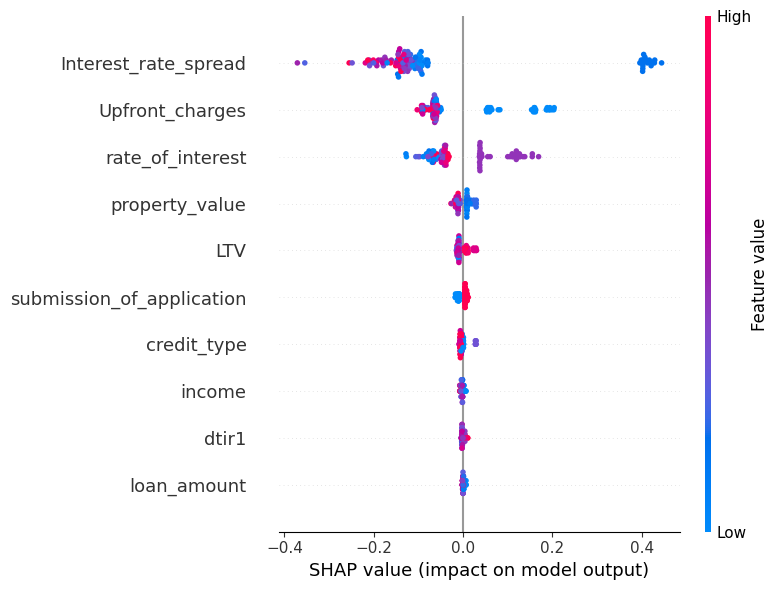

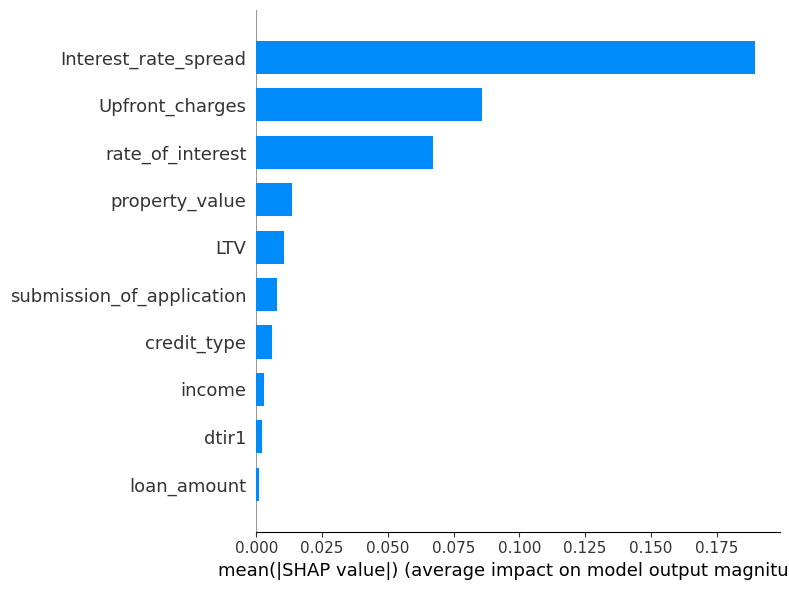

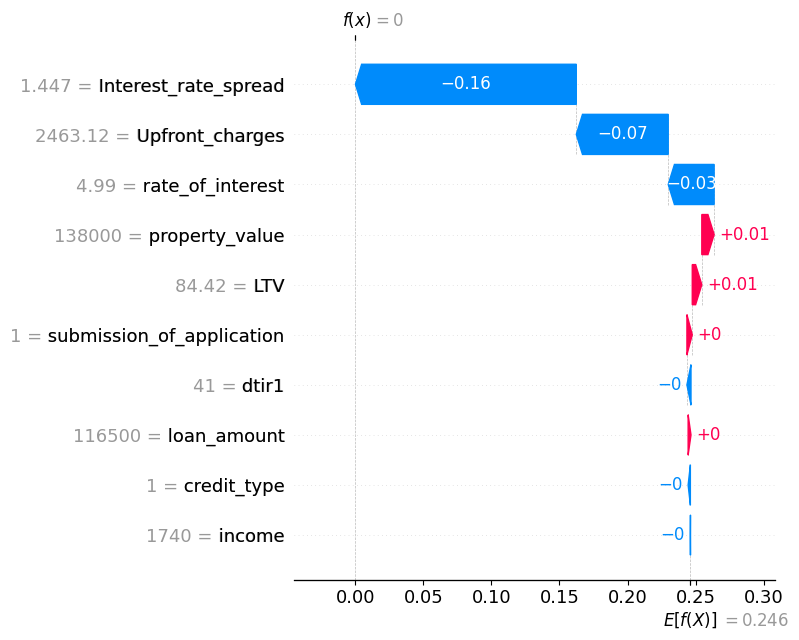

In [90]:
rf_model.fit(X_selected, Y)

# Sample from the data
X_sample = X_selected.sample(100, random_state=42)

# SHAP Explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_sample)  

# ----------------------------
# SHAP Summary Dot Plot (no grid)
# ----------------------------
shap.summary_plot(shap_values[1], X_sample, show=False, plot_type="dot")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.grid(False)  # No effect on SHAP plots, kept for consistency
plt.tight_layout()
plt.show()

# ----------------------------
# SHAP Summary Bar Plot (no grid)
# ----------------------------
shap.summary_plot(shap_values[1], X_sample, show=False, plot_type="bar")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.grid(False)  # No effect on SHAP plots, kept for consistency
plt.tight_layout()
plt.show()

# ----------------------------
# SHAP Waterfall Plot (for first instance) - gridlines removed manually
# ----------------------------
instance_idx = 0
explanation = shap.Explanation(
    values=shap_values[1][instance_idx],
    base_values=explainer.expected_value[1],
    data=X_sample.iloc[instance_idx]
)

shap.waterfall_plot(explanation, show=False)

# Remove gridlines manually
fig = plt.gcf()
ax = plt.gca()
ax.grid(False)

plt.tight_layout()
plt.show()

### LIME Explanation

LIME was used to locally interpret the Random Forest model's prediction for a single instance. The explainer highlights which features contributed most positively or negatively to the predicted outcome. Results are displayed in the notebook for detailed inspection.

In [91]:
#LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_selected.values,
    feature_names=X_selected.columns,
    class_names=[str(cls) for cls in np.unique(Y)],
    mode="classification"
)
lime_exp = explainer_lime.explain_instance(
    X_selected.iloc[42].values,
    rf_model.predict_proba
)

lime_exp.show_in_notebook()

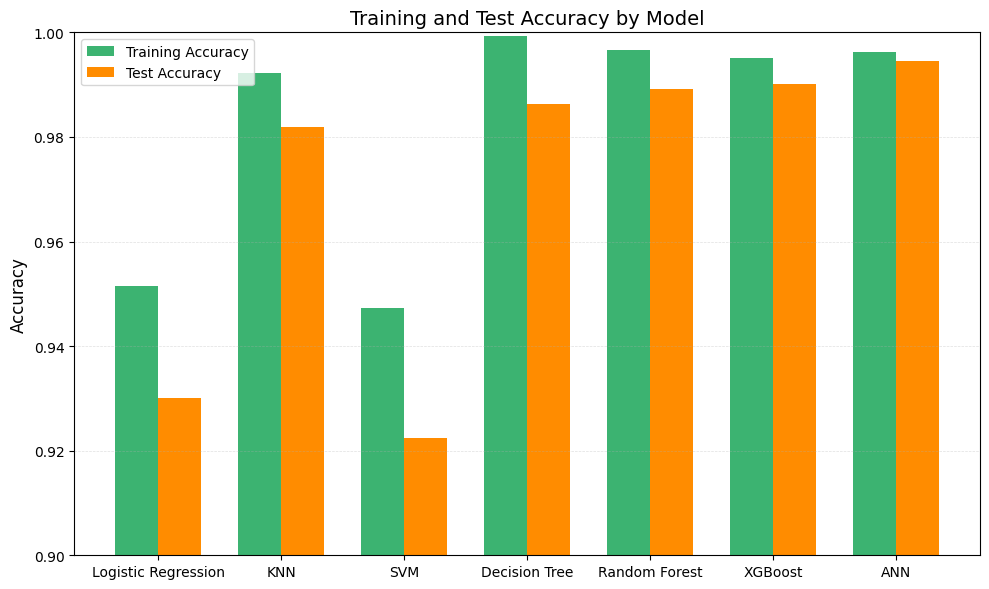

In [92]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']
training_accuracy = [0.9515, 0.9923, 0.9472, 0.9993, 0.9966, 0.9951, 0.9962]  
test_accuracy = [0.9300, 0.9819, 0.9224, 0.9862, 0.9891, 0.9902, 0.9946]       

x = np.arange(len(models))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy', color='mediumseagreen')
bars2 = ax.bar(x + width/2, test_accuracy, width, label='Test Accuracy', color='darkorange')

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Training and Test Accuracy by Model', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center', fontsize=10)
ax.set_ylim(0.9, 1.0)
ax.legend(fontsize=10)

# Add faint horizontal gridlines
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()

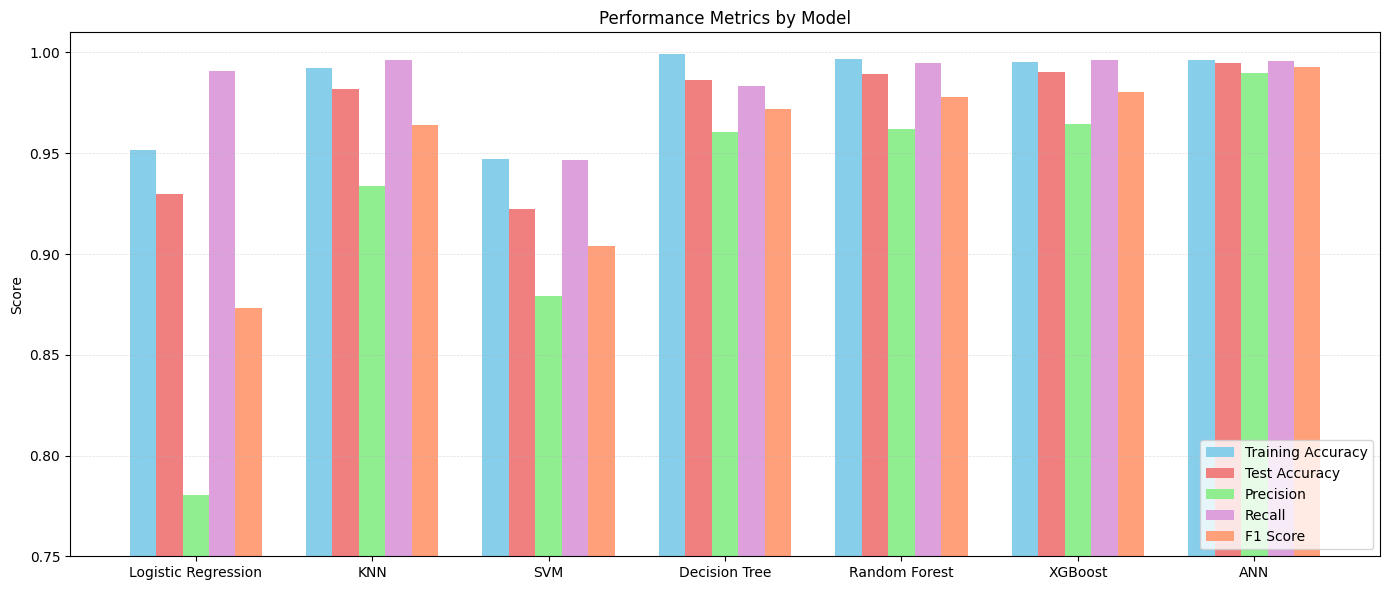

In [93]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']

training_accuracy = [0.9515, 0.9923, 0.9472, 0.9993, 0.9966, 0.9951, 0.9962]
test_accuracy     = [0.9300, 0.9819, 0.9224, 0.9862, 0.9891, 0.9902, 0.9946]
precision         = [0.7806, 0.9338, 0.8793, 0.9607, 0.9619, 0.9643, 0.9896]
recall            = [0.9910, 0.9963, 0.9467, 0.9834, 0.9946, 0.9965, 0.9958]
f1_scores         = [0.8733, 0.9640, 0.9040, 0.9719, 0.9780, 0.9802, 0.9927]  

metrics = [training_accuracy, test_accuracy, precision, recall, f1_scores]
metric_labels = ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum', 'lightsalmon']

x = np.arange(len(models))  
width = 0.15  

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

for i, (metric, label, color) in enumerate(zip(metrics, metric_labels, colors)):
    ax.bar(x + (i - 2)*width, metric, width, label=label, color=color)

ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center', fontsize=10)
ax.set_ylim(0.75, 1.01)
ax.legend(loc='lower right')
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()

### Saving Preprocessing Objects

The fitted `PCA` and `StandardScaler` objects were saved using `joblib` for future use in model inference. This ensures consistent preprocessing during deployment or when making predictions on new data.

In [94]:
joblib.dump(pca, 'pca.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved successfully as 'scaler.pkl'")

✅ Scaler saved successfully as 'scaler.pkl'


### Saving Best Performing Models

The best performing models, including the ANN, Decision Tree, Random Forest, and XGBoost, were saved for future use. This ensures that the top-performing models can be quickly loaded without retraining, supporting deployment and reproducibility.

In [95]:
# Save the ANN model
ann_model_path = '/kaggle/working/trained_ann_model.h5'
model.save(ann_model_path)

# Save the Decision Tree model 
dt_model_path = '/kaggle/working/trained_dt_model.pkl'
joblib.dump(best_dt_model, dt_model_path)

# Save the Random Forest model 
rf_model_path = '/kaggle/working/trained_rf_model.pkl'
joblib.dump(best_rf_model, rf_model_path)

# Save the XGBoost model 
xgb_model_path = '/kaggle/working/trained_xgb_model.pkl'
joblib.dump(best_xgb_model, xgb_model_path)

print("✅ Files in /kaggle/working/:")
print(os.listdir('/kaggle/working'))

✅ Files in /kaggle/working/:
['trained_rf_model.pkl', '.virtual_documents', 'trained_xgb_model.pkl', 'trained_dt_model.pkl', 'scaler.pkl', 'trained_ann_model.h5', 'pca.pkl']
